In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('loan data.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#statistical description

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data=data.dropna(axis=0)

In [9]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [10]:
data['Gender']=le.fit_transform(data.Gender)
data['Married']=le.fit_transform(data.Married)
data['Education']=le.fit_transform(data.Education)
data['Self_Employed']=le.fit_transform(data.Self_Employed)
data['Loan_Status']=le.fit_transform(data.Loan_Status)
data['Property_Area']=le.fit_transform(data.Property_Area)
data

<ipython-input-10-254f46ac3c15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender']=le.fit_transform(data.Gender)
<ipython-input-10-254f46ac3c15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Married']=le.fit_transform(data.Married)
<ipython-input-10-254f46ac3c15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [11]:
corr=data.corr()

In [12]:
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Education,0.059245,0.001652,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390
Property_Area,-0.000204,0.038653,-0.055005,-0.050797,-0.053160,0.006540,-0.109685,-0.058656,-0.003013,1.000000,0.031361


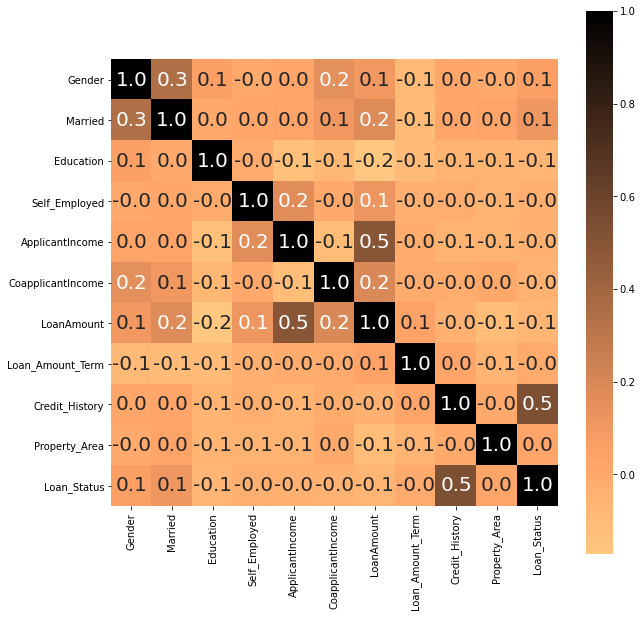

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(corr,annot=True,ax=ax,cmap="copper_r",annot_kws={"size": 20},fmt=".1f",square=True);

In [14]:
x_ind=data.drop(['Loan_Status','Loan_ID','Dependents'],axis=1)

In [15]:
x_ind

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2


In [16]:
y_dep=data.Loan_Status

In [17]:
y_dep

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int32

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=15)

In [19]:
import statsmodels.api as sm
model=sm.Logit(y_train,x_train).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.478024
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.235     
Dependent Variable: Loan_Status      AIC:              387.1226  
Date:               2021-05-30 12:05 BIC:              426.6290  
No. Observations:   384              Log-Likelihood:   -183.56   
Df Model:           9                LL-Null:          -240.05   
Df Residuals:       374              LLR p-value:      3.6373e-20
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Gender             0.1311   0.3393  0.3863 0.6992 -0.5340  0.7962
Married            0.6106   0.2978  2.0507 0.0403  0.0270  1.1943
Education         -0.6997   0.3155 -2.2180 0.0266 -1.3181 -0.0814
Self_Employed     -0.2446   0.3778 -0.6473 0.5174 -0.9851  0.4959
ApplicantIncome    0.0000   0.0000  0.9209 0.3571 -0.0001  0.0001
CoapplicantIncome -0.0000   0.0001 -0.2824 0.7776 -0.0001  0.0001
LoanAmount        -0.0048   0.0022 -2.1591 0.0308 -0.0091 -0.0004
Loan_Amount_Term  -0.0044   0.0013 -3.3903 0.0007 -0.0070 -0.0019
Credit_History     3.1796   0.4026  7.8983 0.0000  2.3906  3.9686
Property_Area     -0.1094   0.1649 -0.6632 0.5072 -0.4325  0.2138
=================================================================

"""

In [20]:
from sklearn.linear_model import LogisticRegression
model_train=LogisticRegression()
model_train.fit(x_train,y_train)
y_pred=model_train.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1])

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[ 9, 17],
       [ 1, 69]], dtype=int64)

In [22]:
accuracy_score(y_test,y_pred)

0.8125

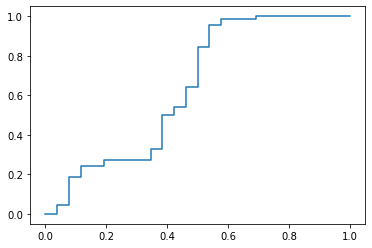

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test,model_train.predict(x_test))
fpr,tpr,thresholds=roc_curve(y_test,model_train.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,logit_roc_auc);

In [24]:
from sklearn.metrics import accuracy_score
z=LogisticRegression(class_weight="balanced")
z.fit(x_train,y_train)
THRESHOLD=0.4

C:\Users\KAVIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
pred=np.where(z.predict_proba(x_test)[:,1]>THRESHOLD,1,0)

In [26]:
pd.DataFrame(data=[accuracy_score(y_test,pred)],index=["accuracy"])

,0
accuracy,0.833333


# Random forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [28]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
y_pred_rfc=rfc.predict(x_test)

In [30]:
acc=model_train.score(x_test,y_pred_rfc)
print(acc)

0.96875


In [31]:
confusion_matrix(y_test,y_pred_rfc)

array([[11, 15],
       [ 2, 68]], dtype=int64)

In [32]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [33]:
rec = recall_score(y_test, y_pred_rfc)
print("The recall is {}".format(rec))
prec = precision_score(y_test, y_pred_rfc)
print("The precision is {}".format(prec))
f1 = f1_score(y_test, y_pred_rfc)
print("The F1-Score is {}".format(f1))

The recall is 0.9714285714285714
The precision is 0.8192771084337349
The F1-Score is 0.8888888888888888


In [34]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (x_test.shape[0], (y_test != y_pred_rfc).sum()))

Number of mislabeled points out of a total 96 points : 17


# XG Boost

In [35]:
pip install xgboost

In [36]:
from xgboost import XGBClassifier

In [37]:
model = XGBClassifier()
model.fit(x_train, y_train)

[12:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KAVIN\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
y_pred_xgb = model.predict(x_test)

In [39]:
y_pred_xgb

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0])

In [40]:
confusion_matrix(y_test,y_pred_xgb)

array([[13, 13],
       [ 6, 64]], dtype=int64)

In [41]:
acc=model_train.score(x_test,y_pred_xgb)
print(acc)

0.90625


In [42]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (x_test.shape[0], (y_test != y_pred_xgb).sum()))

Number of mislabeled points out of a total 96 points : 19


# Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.695
Accuracy score (testing): 0.729
Learning rate:  0.1
Accuracy score (training): 0.818
Accuracy score (testing): 0.812
Learning rate:  0.25
Accuracy score (training): 0.826
Accuracy score (testing): 0.823
Learning rate:  0.5
Accuracy score (training): 0.844
Accuracy score (testing): 0.812
Learning rate:  0.75
Accuracy score (training): 0.839
Accuracy score (testing): 0.833
Learning rate:  1
Accuracy score (training): 0.854
Accuracy score (testing): 0.833


In [45]:
y_pred_gb=gb.predict(x_test)
y_pred_gb

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1])

In [46]:
confusion_matrix(y_test,y_pred_gb)

array([[11, 15],
       [ 1, 69]], dtype=int64)

In [47]:
acc=model_train.score(x_test,y_pred_xgb)
print(acc)

0.90625


In [48]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (x_test.shape[0], (y_test != y_pred_gb).sum()))


Number of mislabeled points out of a total 96 points : 16


In [49]:
#visualization

C:\Users\KAVIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KAVIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KAVIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KAVIN\anaconda3\lib\si

<AxesSubplot:xlabel='Dependents', ylabel='count'>

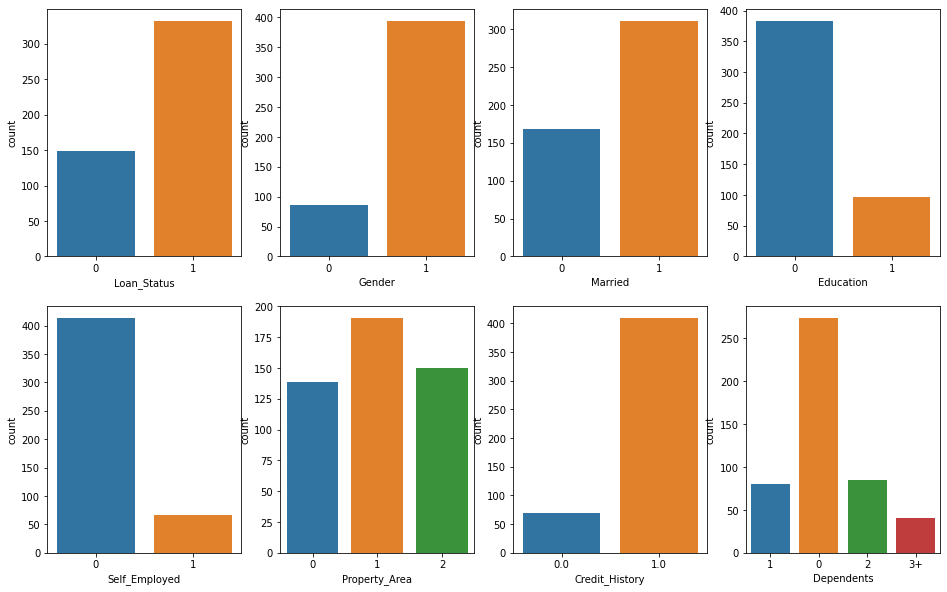

In [50]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sb.countplot('Loan_Status',data=data,ax=ax[0][0])
sb.countplot('Gender',data=data,ax=ax[0][1])
sb.countplot('Married',data=data,ax=ax[0][2])
sb.countplot('Education',data=data,ax=ax[0][3])
sb.countplot('Self_Employed',data=data,ax=ax[1][0])
sb.countplot('Property_Area',data=data,ax=ax[1][1])
sb.countplot('Credit_History',data=data,ax=ax[1][2])
sb.countplot('Dependents',data=data,ax=ax[1][3])

C:\Users\KAVIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

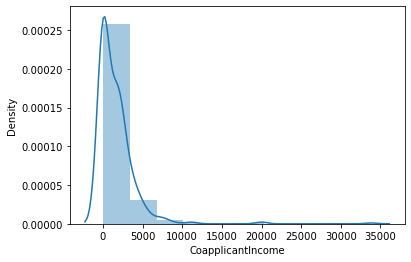

In [51]:
sb.distplot(data['CoapplicantIncome'],kde=True,bins=10)

C:\Users\KAVIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


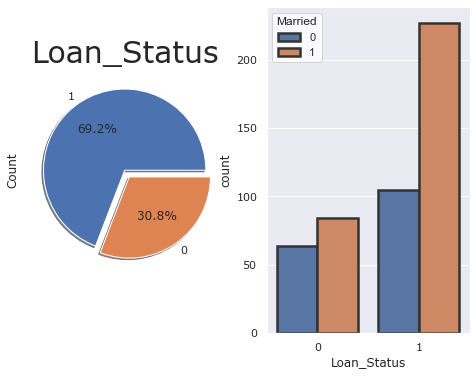

In [54]:
f,ax=plt.subplots(1,2,figsize=(8,6))
data['Loan_Status'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Loan_Status',fontsize=30)
ax[0].set_ylabel('Count')
sb.set(font="Verdana")
sb.set_style("ticks")
sb.countplot('Loan_Status',hue='Married',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

C:\Users\KAVIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


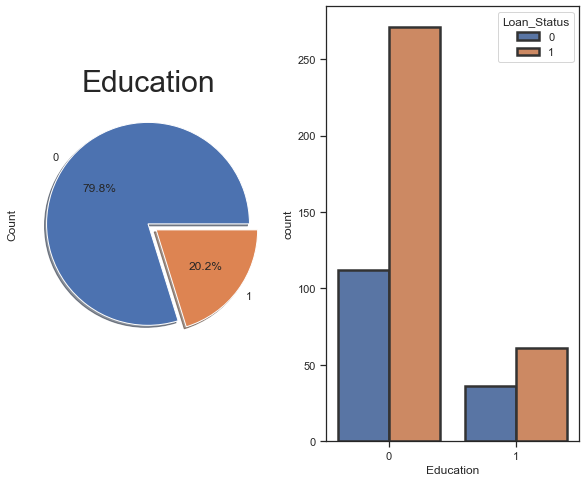

In [56]:
f,ax=plt.subplots(1,2,figsize=(10,8))
data['Education'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Education',fontsize=30)
ax[0].set_ylabel('Count')
sb.set(font="Verdana")
sb.set_style("ticks")
sb.countplot('Education',hue='Loan_Status',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

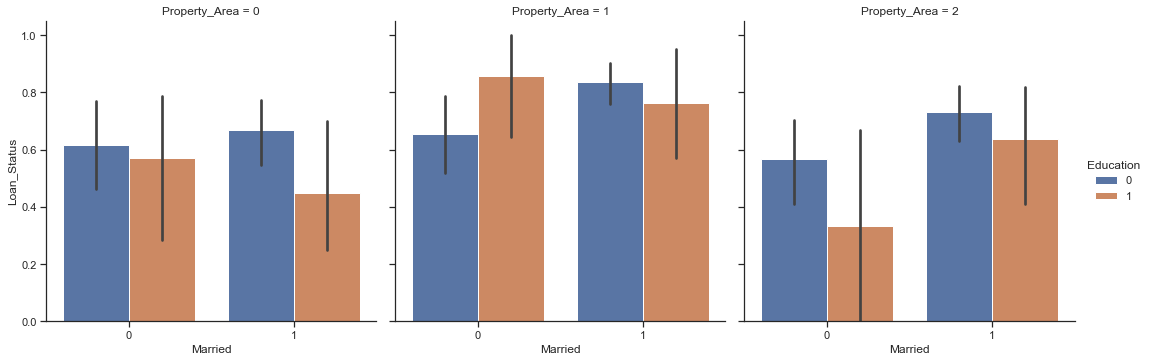

In [55]:
sb.catplot(x='Married',y='Loan_Status',kind='bar',data=data,col='Property_Area',hue='Education')